In [ ]:
# TASK 4
# You are tasked with developing a more sophisticated MLP model for fraud detection in financial transactions. The dataset contains information about various transactions, and the goal is to classify each transaction as either fraudulent (1) or not fraudulent (0). Your tasks are as follows:
# • Load the dataset.
# • Explore the dataset to understand its structure and characteristics.
# • Preprocess the data if necessary.
# • Split the dataset into training and testing sets.
# • Create an MLP model for classification with the following Hidden Layer architecture:
# o Hidden Layer 1: 128 neurons, ReLU activation function.
# o Hidden Layer 2: 64 neurons, Tanh activation function.
# o Hidden Layer 3: 32 neurons, ReLU activation function.
# o Decide input and output by yourself
# • Compile the model with the appropriate loss function and the Adam optimizer.
# • Train the model on the training data for 50 epochs.
# • Evaluate the model on the testing data.
# • Additionally, monitor key metrics like accuracy, precision, recall, or F1 score during training and testing phases.

In [31]:
pip install pandas numpy scikit-learn tensorflow matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r'C:\Users\k224120\Downloads\archive\data2.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df.columns)

if 'Fraud' in df.columns: 
    print(df['Fraud'].value_counts())
else:
    print(f"Column 'Fraud' not found.")

First 5 rows of the dataset:
  Profession  Income   Credit_card_number Expiry  Security_code  Fraud
0     DOCTOR   42509     3515418493460774  07/25            251      1
1     DOCTOR   80334      213134223583196  05/32            858      1
2     LAWYER   91552     4869615013764888  03/30            755      1
3     LAWYER   43623      341063356109385  01/29            160      1
4     DOCTOR   22962  4707418777543978402  11/30            102      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usag

In [38]:
df = df.drop(columns=['Credit_card_number', 'Expiry'])

df = pd.get_dummies(df, columns=['Profession'], drop_first=True)

print("Preprocessed Data:")
print(df.head())

X = df.drop(columns=['Fraud'])
y = df['Fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Preprocessed Data:
   Income  Security_code  Fraud  Profession_ENGINEER  Profession_LAWYER
0   42509            251      1                False              False
1   80334            858      1                False              False
2   91552            755      1                False               True
3   43623            160      1                False               True
4   22962            102      0                False              False


In [40]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  
    Dense(64, activation='tanh'),                              
    Dense(32, activation='relu'),                             
    Dense(1, activation='sigmoid')                            
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("\nMLP Model Summary:")
model.summary()


MLP Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4981 - loss: 0.6969 - val_accuracy: 0.5038 - val_loss: 0.6962
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5291 - loss: 0.6925 - val_accuracy: 0.4975 - val_loss: 0.6952
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5121 - loss: 0.6931 - val_accuracy: 0.5013 - val_loss: 0.6952
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5190 - loss: 0.6931 - val_accuracy: 0.5094 - val_loss: 0.6937
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5122 - loss: 0.6936 - val_accuracy: 0.5088 - val_loss: 0.6940
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.5236 - loss: 0.6919 - val_accuracy: 0.4950 - val_loss: 0.6937
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5051 - loss: 0.6928 - val_accuracy: 0.5050 - val_loss: 0.6944
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5329 - loss: 0.6913 - va

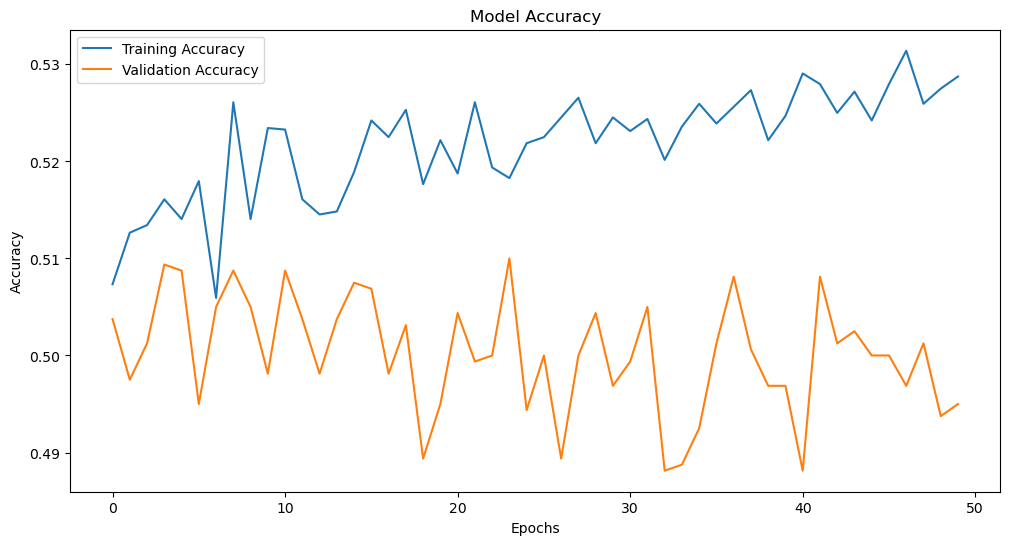

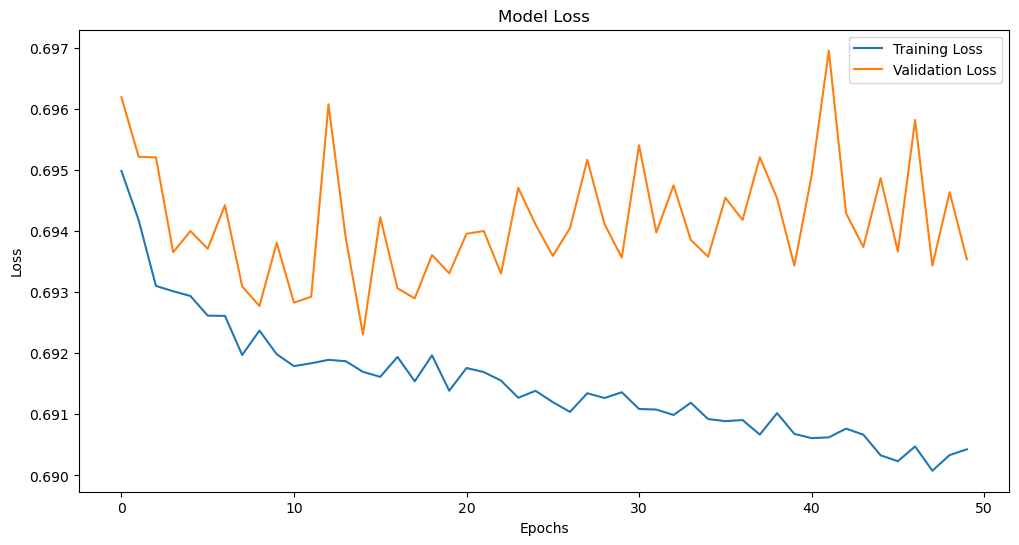

In [41]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Test Accuracy: 0.4935
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       997
           1       0.50      0.64      0.56      1003

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.48      2000

Precision: 0.4961
Recall: 0.6401
F1 Score: 0.5590


In [ ]:
# TASK 5
# Implement MLP on these Dataset
# Dataset 1
# Dataset 2

In [ ]:
# dataset 1: WineQT

In [43]:
df_wine = pd.read_csv(r'C:\Users\k224120\Downloads\WineQT.csv')

df_wine = df_wine.drop(columns=['Id'])

X_wine = df_wine.drop(columns=['quality'])
y_wine = df_wine['quality']

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=42)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23.7463 - mse: 23.7463 - val_loss: 8.3199 - val_mse: 8.3199
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3695 - mse: 5.3695 - val_loss: 3.8009 - val_mse: 3.8009
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3403 - mse: 2.3403 - val_loss: 2.8850 - val_mse: 2.8850
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0137 - mse: 2.0137 - val_loss: 2.5918 - val_mse: 2.5918
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7669 - mse: 1.7669 - val_loss: 2.4074 - val_mse: 2.4074
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5363 - mse: 1.5363 - val_loss: 2.3042 - val_mse: 2.3042
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4979 - mse: 1.4979 - val_loss: 2.1134 - val_mse: 2.1134
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4128 - mse: 1.4128 - val_loss: 2.0065 - val_mse: 2.0065
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2577 - mse

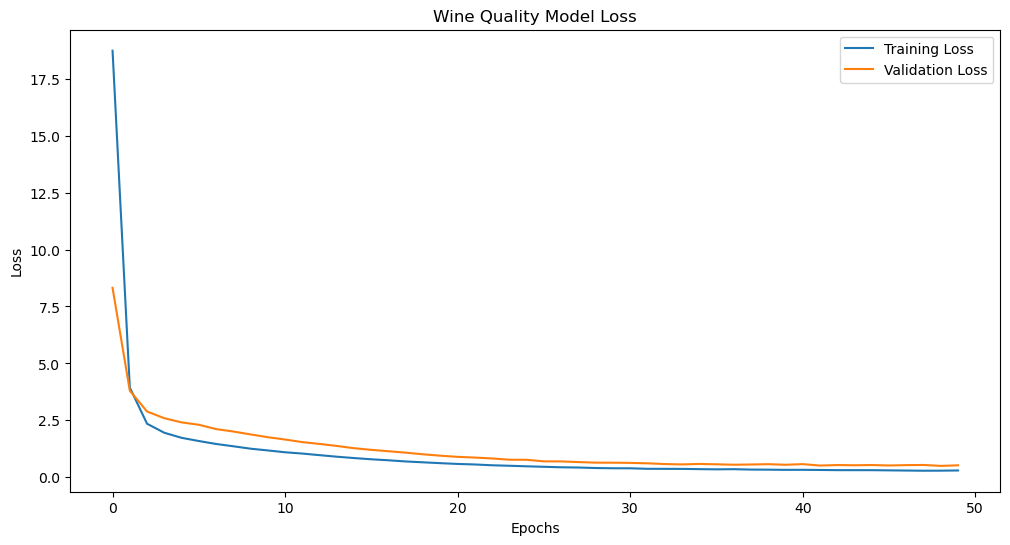

In [45]:
model_wine = Sequential([
    Dense(128, activation='relu', input_dim=X_train_wine.shape[1]),  
    Dense(64, activation='relu'),                                  
    Dense(1, activation='linear')                                   
])

model_wine.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

history_wine = model_wine.fit(X_train_wine, y_train_wine, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history_wine.history['loss'], label='Training Loss')
plt.plot(history_wine.history['val_loss'], label='Validation Loss')
plt.title('Wine Quality Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
test_loss_wine, test_mse_wine = model_wine.evaluate(X_test_wine, y_test_wine, verbose=0)
print(f"\nWine Quality Model Test MSE: {test_mse_wine:.4f}")

y_pred_wine = model_wine.predict(X_test_wine)
mse_wine = mean_squared_error(y_test_wine, y_pred_wine)
print(f"Mean Squared Error (Wine Quality): {mse_wine:.4f}")


Wine Quality Model Test MSE: 0.4014
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (Wine Quality): 0.4014


In [ ]:
# dataset 2: data

In [47]:
df_house = pd.read_csv(r'C:\Users\k224120\Downloads\data.csv')

df_house = df_house.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

X_house = df_house.drop(columns=['price'])
y_house = df_house['price']

X_house_scaled = scaler.fit_transform(X_house)

X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house_scaled, y_house, test_size=0.2, random_state=42)

Epoch 1/50


C:\Users\k224120\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447363645440.0000 - mse: 447363645440.0000 - val_loss: 401482022912.0000 - val_mse: 401482022912.0000
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 476544991232.0000 - mse: 476544991232.0000 - val_loss: 401232691200.0000 - val_mse: 401232691200.0000
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 443652931584.0000 - mse: 443652931584.0000 - val_loss: 400405954560.0000 - val_mse: 400405954560.0000
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 436722040832.0000 - mse: 436722040832.0000 - val_loss: 398699593728.0000 - val_mse: 398699593728.0000
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 459808145408.0000 - mse: 459808145408.0000 - val_loss: 395872174080.0000 - val_mse: 395872174080.0000
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 455315947520.0000 - mse: 455315947520.0000 - val_loss: 391669481472.0000 - val_mse: 391669481472.0000
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 

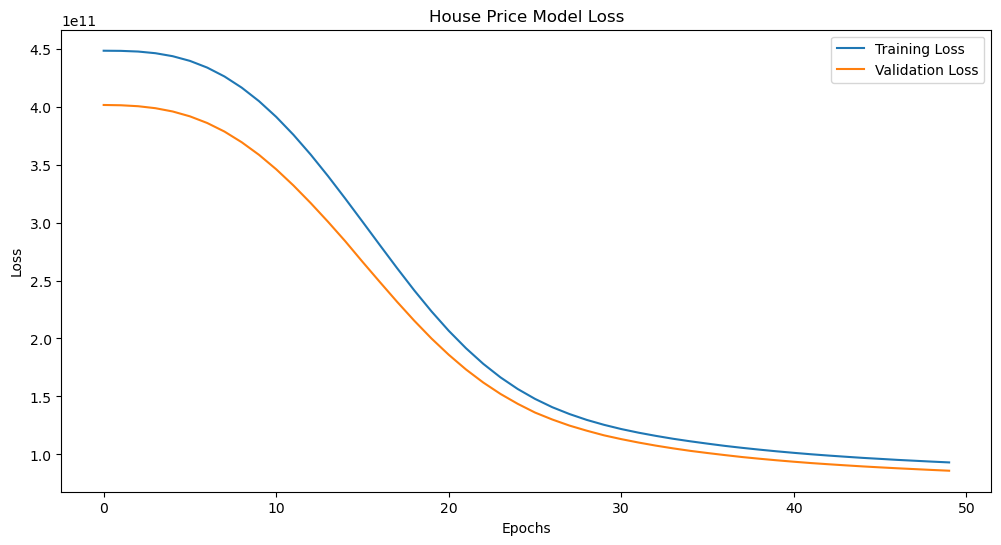

In [48]:
model_house = Sequential([
    Dense(128, activation='relu', input_dim=X_train_house.shape[1]),  
    Dense(64, activation='relu'),                                    
    Dense(1, activation='linear')                                    
])

model_house.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

history_house = model_house.fit(X_train_house, y_train_house, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history_house.history['loss'], label='Training Loss')
plt.plot(history_house.history['val_loss'], label='Validation Loss')
plt.title('House Price Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
test_loss_house, test_mse_house = model_house.evaluate(X_test_house, y_test_house, verbose=0)
print(f"\nHouse Price Model Test MSE: {test_mse_house:.4f}")

y_pred_house = model_house.predict(X_test_house)
mse_house = mean_squared_error(y_test_house, y_pred_house)
print(f"Mean Squared Error (House Price): {mse_house:.4f}")


House Price Model Test MSE: 1030241452032.0000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (House Price): 1030241477973.8789
